# Central Limit Theorem

--- 

## Statement

Suppose $X_1, X_2, \ldots, X_n$ are independent and identically distributed (i.i.d.) random variables with:

- Mean $\mu = \mathbb{E}[X_i]$
- Variance $\sigma^2 = \mathrm{Var}(X_i) < \infty$

Define the sample mean:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

The Central Limit Theorem states that the standardized sample mean

$$
Z_n = \frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} \xrightarrow{d} \mathcal{N}(0,1) \quad \text{as } n \to \infty
$$

meaning for any real numbers $a < b$,

$$
\lim_{n \to \infty} P(a \leq Z_n \leq b) = \Phi(b) - \Phi(a)
$$

where $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

# Analysis

For each combination of sample size and number of samples, do the following:

1. Draws $m$ independent samples from the population, each of size $n$.
2. Computes the sample mean for each of those $m$ samples.
3. Plots a normalized histogram of these $m$ sample means to visualize their empirical distribution.
4. Calculates the mean and variance of these sample means.
5. Overlays a normal distribution curve fitted using the calculated mean and variance.
6. Annotates the subplot with the current sample size, number of samples, and variance of the sample means.

This visualization illustrates how:

- Increasing the sample size reduces the variance of the sample mean distribution, making it tighter.
- The shape of the sample mean distribution approaches a normal distribution regardless of the population's shape, affirming the Central Limit Theorem.
- Increasing the number of samples produces smoother histograms, better approximating the theoretical distribution.

Mathematically, for each sample $S_j \in \{j, \ldots, m\}$ of size \( n \), the sample mean is,

$$
\bar{X}_j = \frac{1}{n} \sum_{i=1}^n X_i^{(j)}
$$

The empirical mean and variance of these sample means are,

$$
\mu_{\bar{X}} = \frac{1}{m} \sum_{j=1}^m \bar{X}_j, \quad \sigma_{\bar{X}}^2 = \frac{1}{m} \sum_{j=1}^m (\bar{X}_j - \mu_{\bar{X}})^2
$$

By the Central Limit Theorem, as $n \to \infty$:

$$
\bar{X}_j \xrightarrow{d} \mathcal{N} \left( \mu, \frac{\sigma^2}{n} \right)
$$

where $\mu$ and $\sigma^2$ are the population mean and variance.

In [1]:
from typing import Sequence

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
def plot_clt_variation(
    population: np.ndarray,
    sample_sizes: Sequence[int],
    num_samples_list: Sequence[int],
) -> None:
    cols = len(sample_sizes)
    rows = len(num_samples_list)

    _, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), squeeze=False)
    colors = [
        "blue",
        "green",
        "orange",
        "purple",
        "red",
        "cyan",
        "magenta",
        "brown",
        "olive",
        "gray",
    ]

    for i, num_samples in enumerate(num_samples_list):
        for j, sample_size in enumerate(sample_sizes):
            ax = axes[i, j]
            # Draw num_samples samples each of size sample_size, from population with replacement
            samples = np.random.choice(
                population,
                size=(num_samples, sample_size),
                replace=True,
            )
            # Compute mean of each sample
            sample_means = samples.mean(axis=1)

            # Plot normalized histogram of sample means for current settings
            ax.hist(
                sample_means,
                bins=30,
                density=True,
                alpha=0.5,
                color=colors[j % len(colors)],
                label=f"Sample size={sample_size}, Num samples={num_samples}",
            )

            # Compute mean and variance of sample means and plot normal distribution fit
            mean = sample_means.mean()
            variance = sample_means.var()
            std = np.sqrt(variance)

            x = np.linspace(min(sample_means), max(sample_means), 200)
            ax.plot(
                x,
                stats.norm.pdf(x, mean, std),
                color="black",
                lw=2,
                label=f"Normal fit (Var={variance:.4f})",
            )

            # Set labels and legend for subplot
            ax.set_title(f"Sample size={sample_size}, Num samples={num_samples}")
            ax.set_xlabel("Sample Mean")
            ax.set_ylabel("Density")
            ax.legend()

    # Adjust layout so plots fit nicely
    plt.tight_layout()
    plt.show()

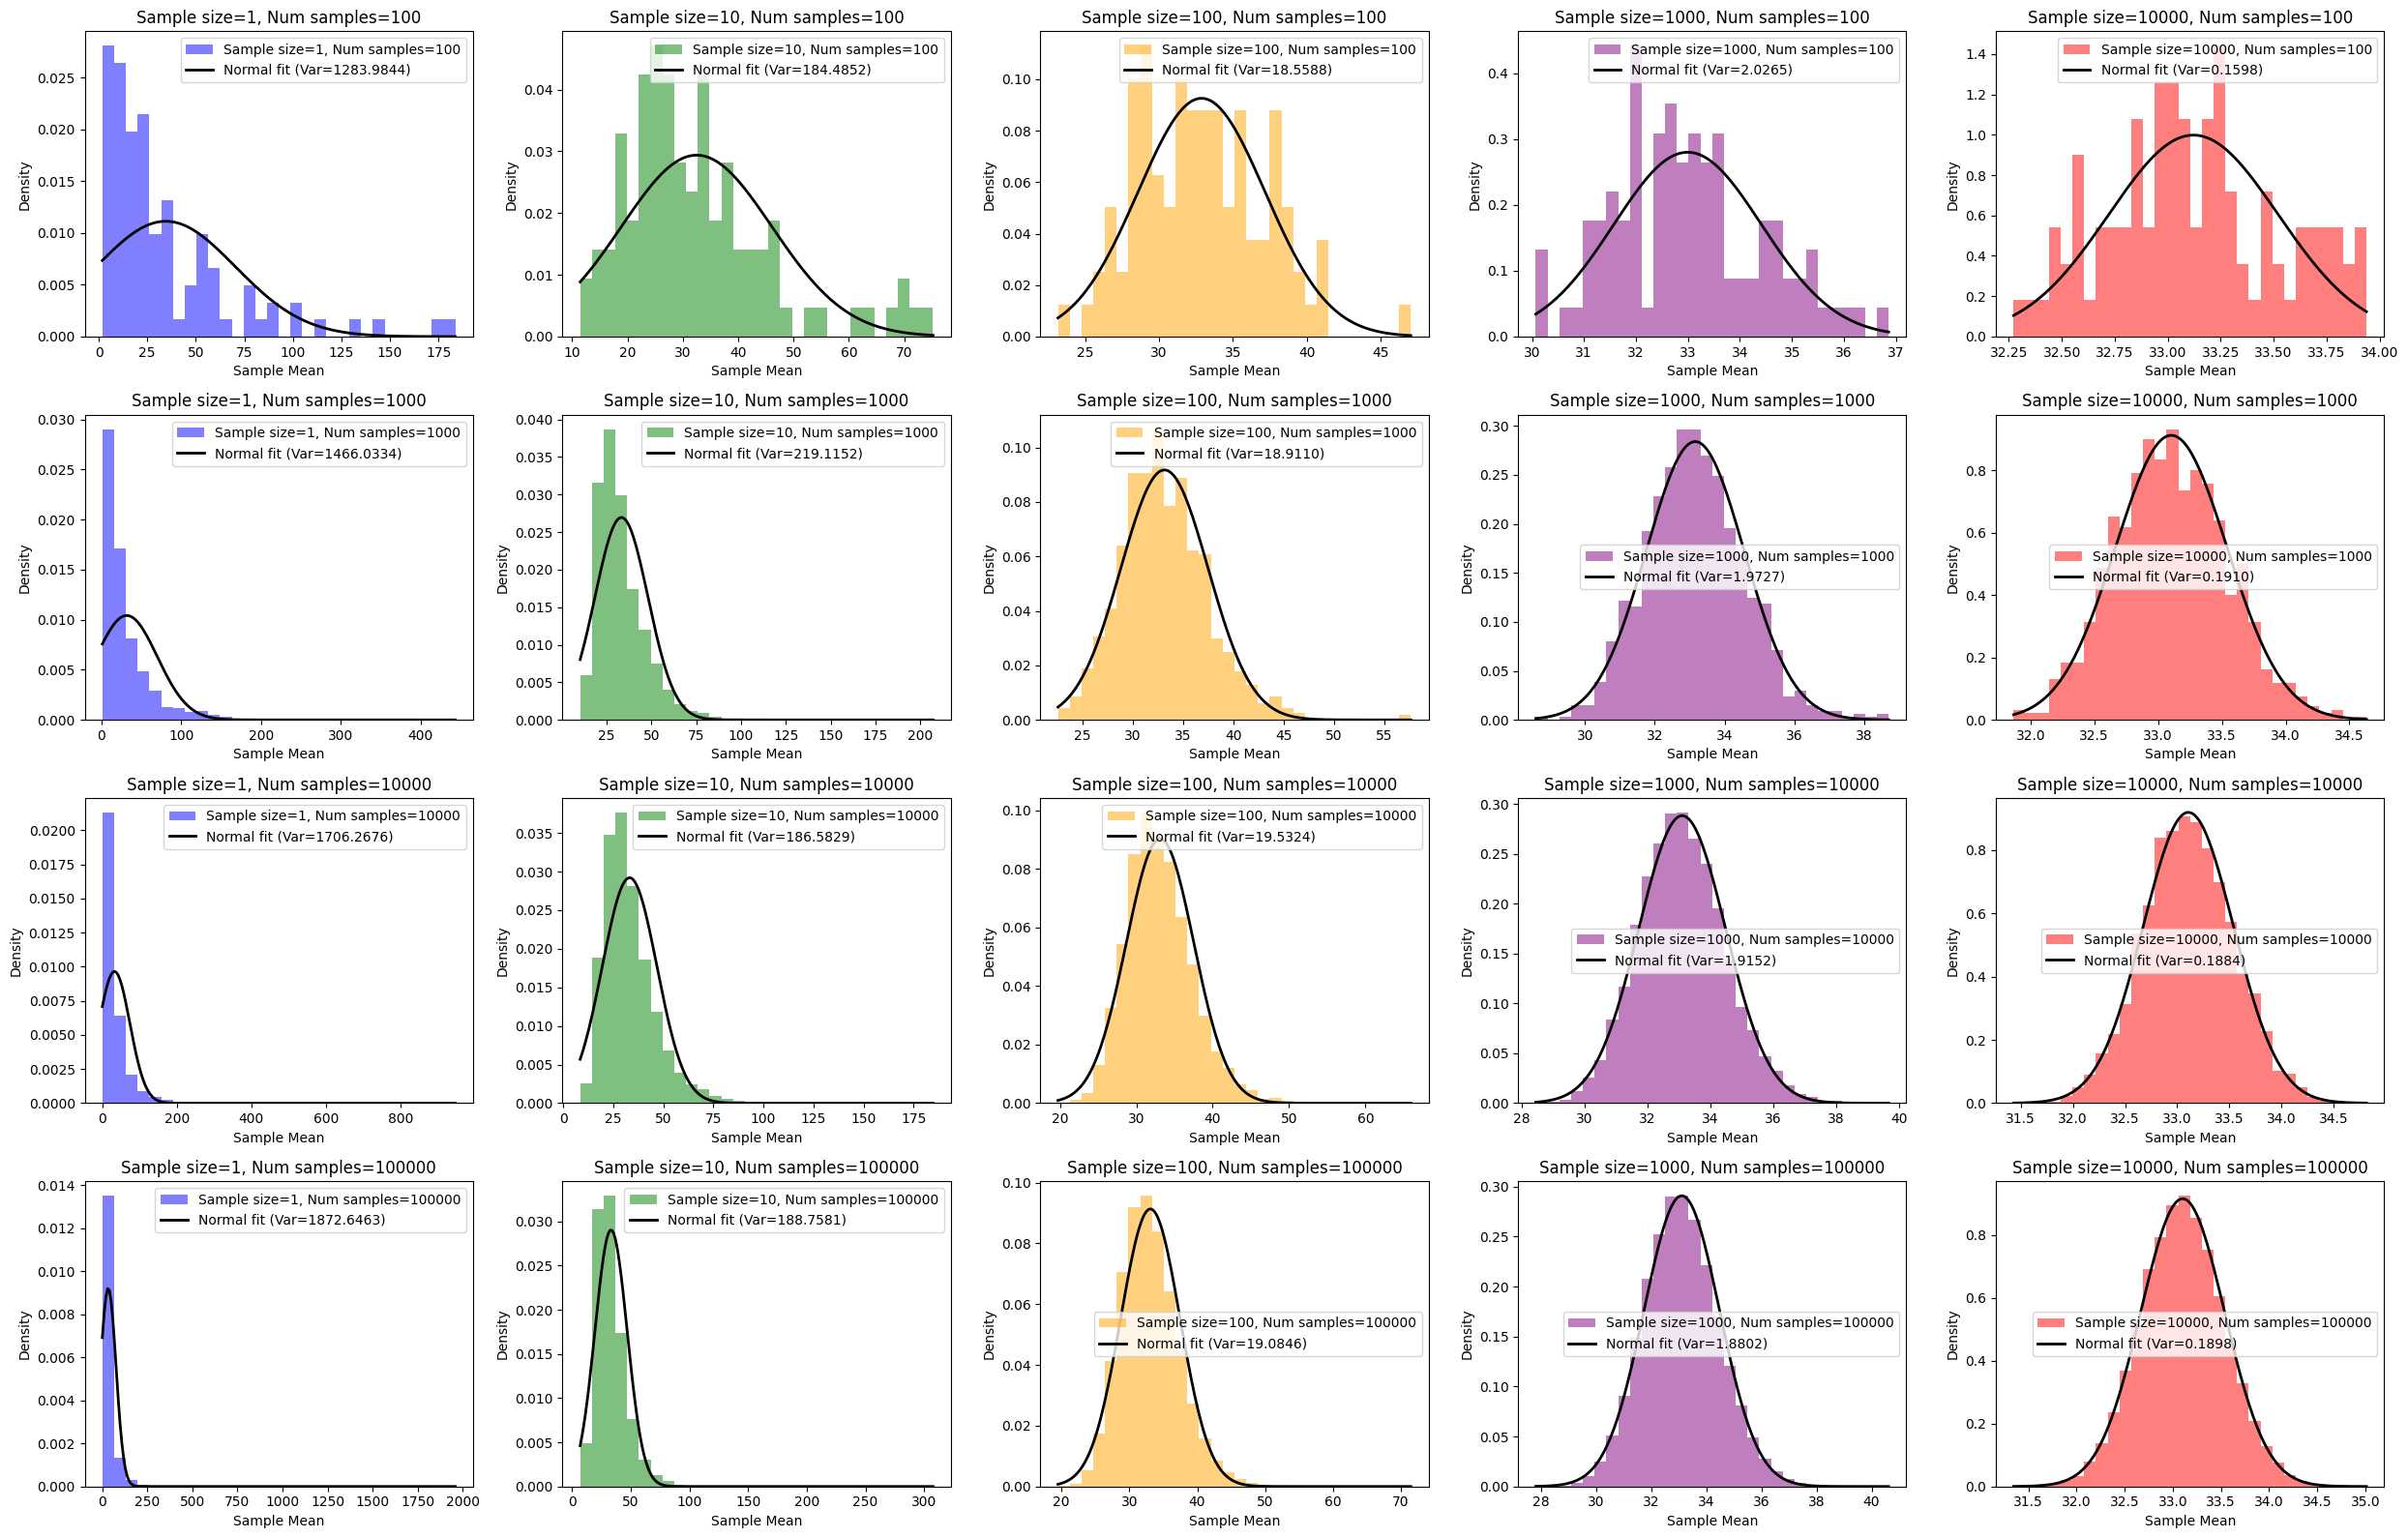

In [3]:
population = np.random.lognormal(mean=3.0, sigma=1.0, size=int(1e6))
sample_sizes = [int(1e0), int(1e1), int(1e2), int(1e3), int(1e4)]
num_samples_list = [int(1e2), int(1e3), int(1e4), int(1e5)]

plot_clt_variation(population, sample_sizes, num_samples_list)